Becky's EDA for Fraud Case Study

#### Initial EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_json('~/data.json')

In [3]:
df.to_csv('/Users/beckyepeters/dsi_galvanize/groupprojects/fraud-detection-case-study/data/df.csv', index=False)

In [4]:
df.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,...,"[{'event_id': 527017, 'cost': 25.0, 'availabil...",36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,...,"[{'event_id': 786878, 'cost': 35.0, 'availabil...",149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,...,"[{'event_id': 787337, 'cost': 93.51, 'availabi...",214,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA
3,premium,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,...,"[{'event_id': 885645, 'cost': 25.0, 'availabil...",889,1283870102,3,,None,NaN,NaN,None,None
4,premium,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,...,"[{'event_id': 1114349, 'cost': 150.0, 'availab...",35,1288984065,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14337 entries, 0 to 14336
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   acct_type           14337 non-null  object 
 1   approx_payout_date  14337 non-null  int64  
 2   body_length         14337 non-null  int64  
 3   channels            14337 non-null  int64  
 4   country             14256 non-null  object 
 5   currency            14337 non-null  object 
 6   delivery_method     14321 non-null  float64
 7   description         14337 non-null  object 
 8   email_domain        14337 non-null  object 
 9   event_created       14337 non-null  int64  
 10  event_end           14337 non-null  int64  
 11  event_published     14238 non-null  float64
 12  event_start         14337 non-null  int64  
 13  fb_published        14337 non-null  int64  
 14  gts                 14337 non-null  float64
 15  has_analytics       14337 non-null  int64  
 16  has_

In [6]:
df.describe()

,approx_payout_date,body_length,channels,delivery_method,event_created,event_end,event_published,event_start,fb_published,gts,...,org_facebook,org_twitter,sale_duration,sale_duration2,show_map,user_age,user_created,user_type,venue_latitude,venue_longitude
count,1.433700e+04,14337.000000,14337.000000,14321.000000,1.433700e+04,1.433700e+04,1.423800e+04,1.433700e+04,14337.000000,14337.000000,...,14278.000000,14278.000000,14182.000000,14337.000000,14337.000000,14337.000000,1.433700e+04,14337.000000,13261.000000,13261.000000
mean,1.350933e+09,3672.521936,6.176676,0.439564,1.345825e+09,1.350501e+09,1.340854e+09,1.350205e+09,0.127433,2430.231492,...,7.974436,4.306976,46.869694,50.576759,0.844179,374.226547,1.313492e+09,2.711097,35.221736,-59.490368
std,2.401300e+07,5758.113003,3.860333,0.591487,2.404107e+07,2.401299e+07,8.750386e+07,2.398787e+07,0.333468,9142.308260,...,11.761241,6.011520,54.825253,59.678090,0.362698,418.593616,4.152174e+07,1.606726,20.207588,66.569034
min,1.171256e+09,0.000000,0.000000,0.000000,1.170332e+09,1.170824e+09,0.000000e+00,1.170819e+09,0.000000,0.000000,...,0.000000,0.000000,-1094.000000,-1094.000000,0.000000,0.000000,1.011210e+09,1.000000,-45.045208,-159.390183
25%,1.334221e+09,750.000000,5.000000,0.000000,1.329754e+09,1.333789e+09,1.329499e+09,1.333406e+09,0.000000,116.410000,...,0.000000,0.000000,16.000000,17.000000,1.000000,13.000000,1.286824e+09,1.000000,33.959338,-96.957828
50%,1.355805e+09,1990.000000,6.000000,0.000000,1.351043e+09,1.355373e+09,1.351099e+09,1.355000e+09,0.000000,431.930000,...,0.000000,0.000000,32.000000,35.000000,1.000000,242.000000,1.316636e+09,3.000000,39.974104,-79.425579
75%,1.370646e+09,4280.000000,8.000000,1.000000,1.365346e+09,1.370214e+09,1.365478e+09,1.370048e+09,0.000000,1547.260000,...,14.000000,11.000000,59.000000,63.000000,1.000000,603.000000,1.346790e+09,3.000000,44.857040,-3.187449
max,1.523488e+09,65535.000000,13.000000,3.000000,1.382012e+09,1.523056e+09,1.381608e+09,1.418850e+09,1.000000,306293.930000,...,91.000000,34.000000,980.000000,980.000000,1.000000,3794.000000,1.381543e+09,103.000000,64.844022,176.169492


In [7]:
df.description[7]

'<p><em>WHEN JEKYLL MET HYDE</em></p>\r\n<p>The Magnetic Theatre in The Magnetic Field proudly presents the world\xa0premiere of <em>When Jekyll Met Hyde,</em> "a gleefully ridiculous take on the classic tale of passion," written and\xa0directed by Magnetic Theatre Artistic Director Steven Samuels.</p>\r\n<p>Drawing on every written, dramatized, and filmed version of the Robert Louis Stevenson classic\xa0imaginable, and relevant 19th century literary and philosophical classics, <em>When Jekyll Met Hyde</em> features an\xa0unusual feminist twist and a surprise ending. To double the fun, and to honor the split personality at the heart of\xa0the story, The Magnetic Theatre is mounting two different productions simultaneously, one set in the 1950s, the\xa0other in the 1960s, with two different casts, in alternating repertory! \xa0</p>\r\n<p>For a full description go to\xa0<a href="http://www.themagneticfield.com/when-jekyll-met-hyde">http://www.themagneticfield.com/when-jekyll-met-hyde</a>

In [8]:
df.acct_type.value_counts(normalize=True)

premium             0.863012
fraudster_event     0.059357
fraudster           0.030481
spammer_limited     0.015205
spammer_warn        0.010044
tos_warn            0.006347
spammer_noinvite    0.005859
tos_lock            0.005371
locked              0.003766
fraudster_att       0.000349
spammer_web         0.000139
spammer             0.000070
Name: acct_type, dtype: float64

In [9]:
# Creating a fraud target for classification based on string in acct_type (per assignment)
df['fraud'] = df.acct_type.str.contains('fraud')

In [10]:
# Imbalanced classes... 91 / 9 
df.fraud.value_counts(normalize=True)

False    0.909814
True     0.090186
Name: fraud, dtype: float64

In [11]:
df.fraud.value_counts()

False    13044
True      1293
Name: fraud, dtype: int64

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


''

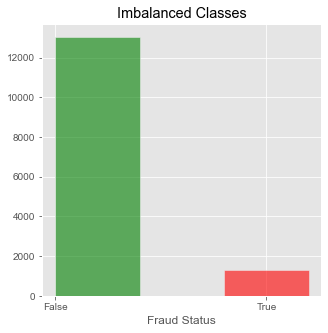

In [12]:
# Plot ratio of classes in the dataset

fig, ax = plt.subplots(figsize=(5, 5))
sns.histplot(x='fraud', data=df, hue='fraud', palette={False: 'g', True: 'r'}, ax=ax, binwidth=.4, alpha=.6)
ax.set(xticks=(0,1), xticklabels=(['False', 'True']), ylabel=None, xlabel='Fraud Status', title='Imbalanced Classes')
plt.legend([],[], frameon=False)
sns.set_style('whitegrid')
;

In [16]:
df.ticket_types[1]
# nested dict in this and one other column

[{'event_id': 786878,
  'cost': 35.0,
  'availability': 1,
  'quantity_total': 50,
  'quantity_sold': 22},
 {'event_id': 786878,
  'cost': 35.0,
  'availability': 1,
  'quantity_total': 50,
  'quantity_sold': 3}]

In [17]:
# Counts of different types of accounts
acct_df = df.groupby(['acct_type']).count()
acct_df['fraud']


acct_type
fraudster             437
fraudster_att           5
fraudster_event       851
locked                 54
premium             12373
spammer                 1
spammer_limited       218
spammer_noinvite       84
spammer_warn          144
spammer_web             2
tos_lock               77
tos_warn               91
Name: fraud, dtype: int64

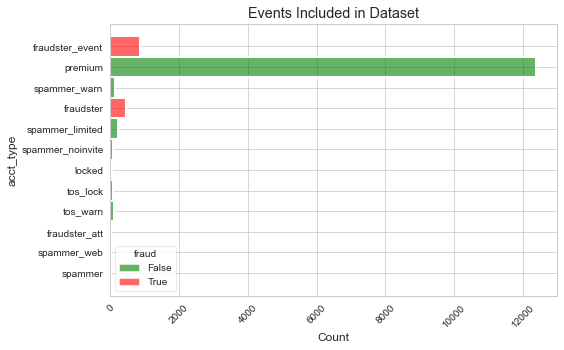

In [18]:
# Plot events included in the dataset

fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(data=df, hue=df.fraud, ax=ax, stat='count', 
             palette={True:'r', False:'g'}, y='acct_type', 
            legend=True, alpha=.6)
ax.tick_params(axis='x', rotation=45)
ax.set_title('Events Included in Dataset')
sns.set_style('whitegrid')

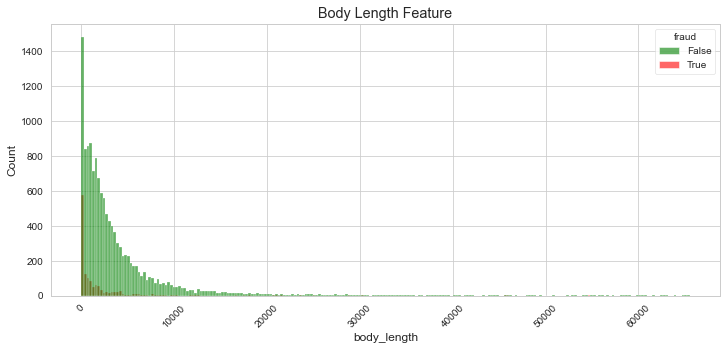

In [19]:
# Histogram of Body Length Feature

fig, ax = plt.subplots(figsize=(12, 5))
sns.histplot(x=df.body_length, hue=df.fraud, palette={True:'r', False:'g'}, alpha=.6, multiple='layer')
ax.tick_params(axis='x', rotation=45)
ax.set_title('Body Length Feature')
sns.set_style('whitegrid')

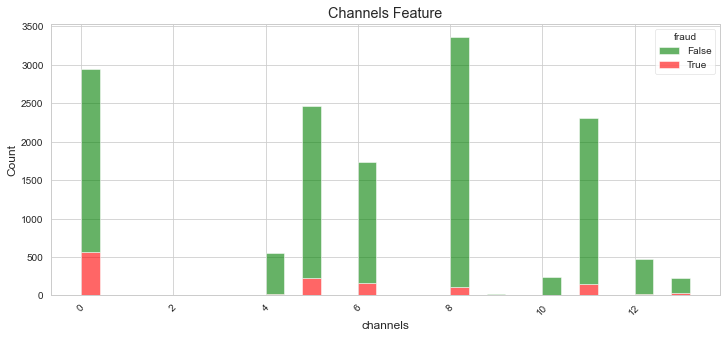

In [20]:
# Histogram for Channels Feature

fig, ax = plt.subplots(figsize=(12, 5))
sns.histplot(data=df, x='channels', hue='fraud', palette={True:'r', False:'g'}, multiple='stack', binwidth=.4, alpha=.6)
ax.tick_params(axis='x', rotation=45)
ax.set_title('Channels Feature')
sns.set_style('whitegrid')

In [21]:
df.channels.unique()

array([ 5,  0,  8,  6, 11, 12,  4, 10, 13,  9,  7])

In [22]:
# Replace NaNs with Unknown for country so we can still use the rest of the data

df.country.replace({np.nan: 'Unknown', '': 'Unknown'}, inplace=True)

In [23]:
len(df.country.unique())

72

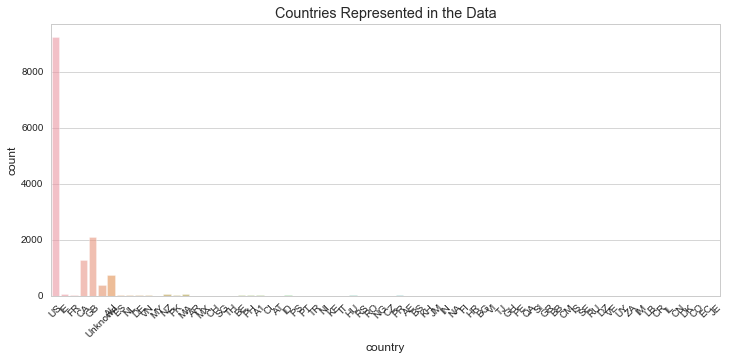

In [24]:
# Histogram of all countries

fig, ax = plt.subplots(figsize=(12, 5))
sns.countplot(x=df.country, alpha=.6)
ax.set_title('Countries Represented in the Data')
ax.tick_params(axis='x', rotation=45)
sns.set_style('whitegrid')

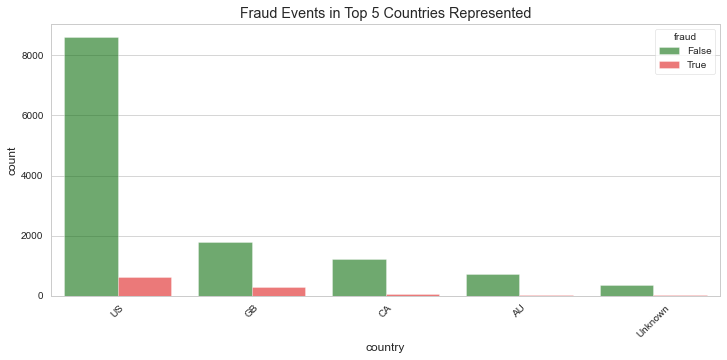

In [25]:
# Histogram of top 5 countries

fig, ax = plt.subplots(figsize=(12, 5))
sns.countplot(x=df.country, hue=df.fraud, palette={True:'r', False:'g'}, order=df.country.value_counts().iloc[:5].index, alpha=.6)
ax.tick_params(axis='x', rotation=45)
ax.set_title('Fraud Events in Top 5 Countries Represented')
sns.set_style('whitegrid')

In [26]:
df.country.value_counts()[:10]

US         9234
GB         2083
CA         1262
AU          742
Unknown     397
NZ           73
IE           48
MA           47
DE           43
FR           40
Name: country, dtype: int64

In [27]:
country_df_5 = df[df['country'].str.contains('US|GB|CA|AU|Unknown')]
country_df_5[country_df_5['country']=='Unknown'].fraud.value_counts()

False    357
True      40
Name: fraud, dtype: int64

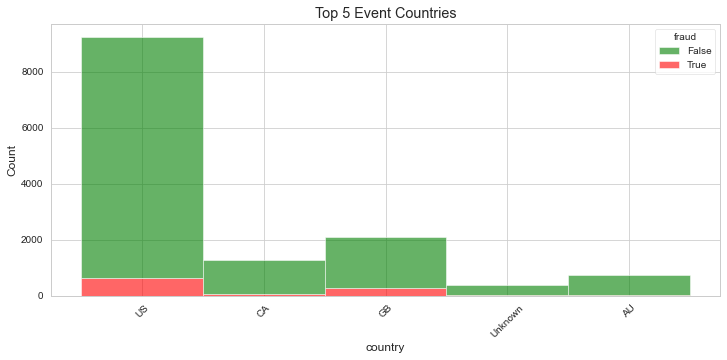

In [28]:
# Top 5 countries

fig, ax = plt.subplots(figsize=(12, 5))
sns.histplot(data=country_df_5, x='country', hue='fraud', palette={True:'r', False:'g'}, multiple='stack', alpha=.6)
ax.tick_params(axis='x', rotation=45)
ax.set_title('Top 5 Event Countries')
sns.set_style('whitegrid')

In [30]:
df.country.value_counts()[:5]

US         9234
GB         2083
CA         1262
AU          742
Unknown     397
Name: country, dtype: int64

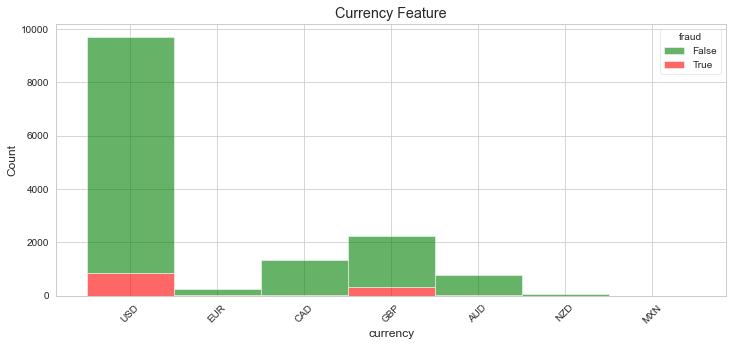

In [31]:
# Histogram of Currency Feature

fig, ax = plt.subplots(figsize=(12, 5))
sns.histplot(x=df.currency, hue=df.fraud, palette={True:'r', False:'g'}, multiple='stack', alpha=0.6)
ax.tick_params(axis='x', rotation=45)
ax.set_title('Currency Feature')
sns.set_style('whitegrid')

In [32]:
# Curious about the 'name' feature

name_list = df.name.to_list()

In [33]:
name_list[:20]

['99 HOUR "NO SLEEP" SUPER BOWL CELEBRITY WEEKEND GRAND FINALE',
 'Winthrop RUF Winter Getaway',
 'DRDP (2010) Teacher Training',
 'ITTA Affiliation 2013',
 'Self Defense for Writers and Filmmakers: For Artists and Attorneys',
 'Bluegrass Stallions vs Rochester Razorsharks',
 'Fridays at Four Frederick 2011-02-11',
 'When Jekyll Met Hyde (1960s)',
 'A Sweetheart Affair',
 'When Jekyll Met Hyde (1950s)',
 'Understanding and Supporting Families with Domestic Violence Issues',
 'Wild Seafood: San Francisco Fishing Tour Feb 13',
 'LinkedIn Profiles Plus (BAC) – Ft. Worth, TX, April 12, 2011',
 'CSPA Presenting Guy Kawasaki Enchantment - The Art of Changing Hearts, Minds and Actions',
 'Simply Stylist Seminar',
 'Race to Nowhere, Candlewood Middle School, Dix Hills, NY',
 'Race to Nowhere, Endicott College, hosted by ConSone Academy',
 'Martin England & the Recontructed Benefit Show',
 'IPCybercrime Boot Camp - Vancouver 2011',
 'Mélange Fashion Show 2011']

In [34]:
df.name_length

0        60
1        27
2        28
3        21
4        66
         ..
14332    27
14333    42
14334    67
14335    54
14336    11
Name: name_length, Length: 14337, dtype: int64

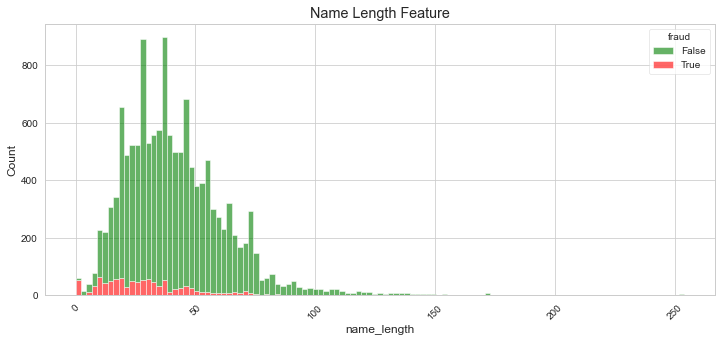

In [35]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.histplot(data=country_df_5, x='name_length', hue='fraud', palette={True:'r', False:'g'}, multiple='stack', alpha=.6)
ax.tick_params(axis='x', rotation=45)
ax.set_title('Name Length Feature')
sns.set_style('whitegrid')

In [36]:
corr = df.corr()

In [37]:
corr

,approx_payout_date,body_length,channels,delivery_method,event_created,event_end,event_published,event_start,fb_published,gts,...,org_twitter,sale_duration,sale_duration2,show_map,user_age,user_created,user_type,venue_latitude,venue_longitude,fraud
approx_payout_date,1.000000,0.012119,-0.132407,0.008236,0.971428,1.000000,0.258852,0.993599,-0.042300,-0.015375,...,0.099062,0.101334,0.093127,0.178705,0.096934,0.478025,-0.038313,-0.067441,0.117174,-0.042553
body_length,0.012119,1.000000,0.079067,0.133757,-0.007857,0.012119,0.023029,0.010634,0.040859,0.046967,...,0.060596,0.081444,0.086428,0.023452,0.117866,-0.107214,0.055118,-0.011973,0.019340,-0.118308
channels,-0.132407,0.079067,1.000000,0.111843,-0.156087,-0.132408,0.013372,-0.132755,0.105567,0.041621,...,0.063206,0.108683,0.110410,0.024795,0.028107,-0.114858,0.043678,0.026885,-0.026504,-0.165358
delivery_method,0.008236,0.133757,0.111843,1.000000,-0.032090,0.008236,-0.011735,0.006155,0.073214,0.102155,...,0.085791,0.178369,0.176043,-0.020470,0.134883,-0.136667,0.097518,-0.008135,0.001709,-0.194046
event_created,0.971428,-0.007857,-0.156087,-0.032090,1.000000,0.971428,0.261456,0.976971,-0.047690,-0.049791,...,0.087655,-0.096839,-0.117546,0.181047,0.093132,0.497883,-0.045719,-0.067870,0.111316,-0.006436
event_end,1.000000,0.012119,-0.132408,0.008236,0.971428,1.000000,0.258852,0.993599,-0.042300,-0.015375,...,0.099062,0.101334,0.093127,0.178705,0.096934,0.478025,-0.038313,-0.067441,0.117174,-0.042553
event_published,0.258852,0.023029,0.013372,-0.011735,0.261456,0.258852,1.000000,0.259712,0.010358,-0.003901,...,-0.001973,-0.093951,-0.011205,0.055957,0.052626,0.104334,0.002214,-0.024138,0.044424,-0.077322
event_start,0.993599,0.010634,-0.132755,0.006155,0.976971,0.993599,0.259712,1.000000,-0.039954,-0.016032,...,0.101035,0.106102,0.097051,0.185659,0.097020,0.481159,-0.037735,-0.066269,0.116372,-0.044995
fb_published,-0.042300,0.040859,0.105567,0.073214,-0.047690,-0.042300,0.010358,-0.039954,1.000000,0.010243,...,0.067557,0.034265,0.036545,0.049417,0.030669,-0.054330,0.054787,0.007749,-0.027754,-0.099143
gts,-0.015375,0.046967,0.041621,0.102155,-0.049791,-0.015375,-0.003901,-0.016032,0.010243,1.000000,...,0.004569,0.158592,0.157817,-0.004129,-0.006839,-0.022876,0.016251,-0.000503,-0.015728,-0.017875


<AxesSubplot:>

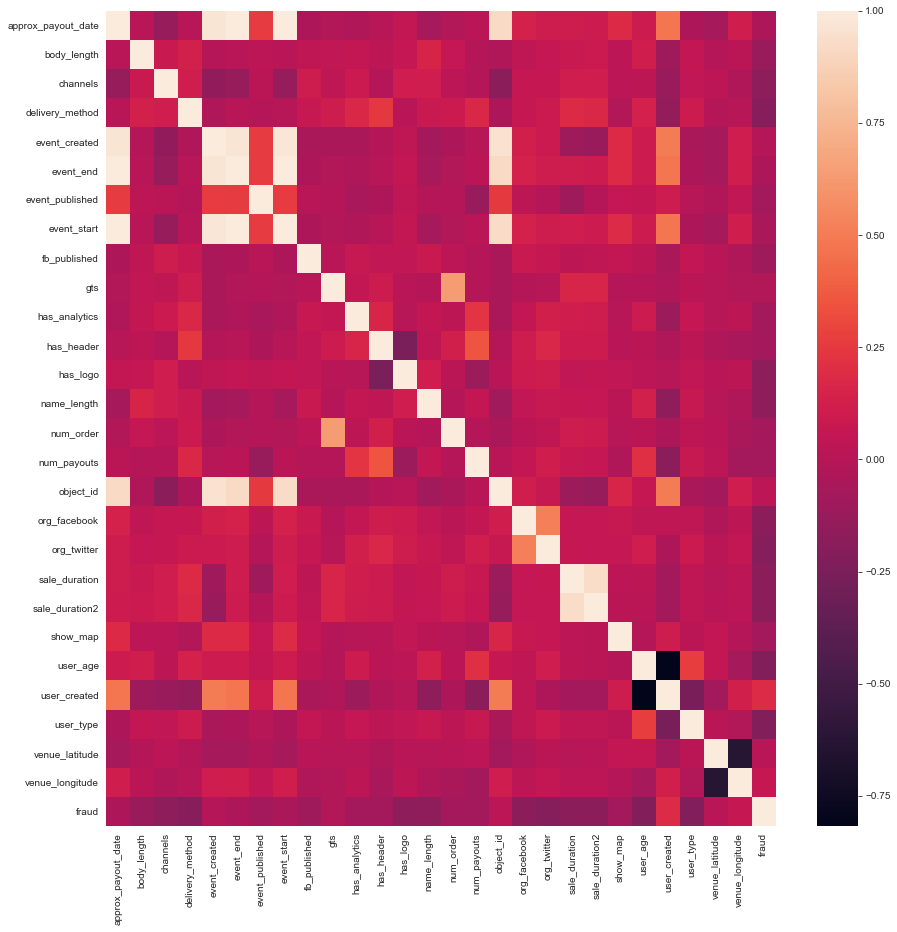

In [38]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, ax=ax)

Text(0.5, 1.0, 'Sale Duration Features')

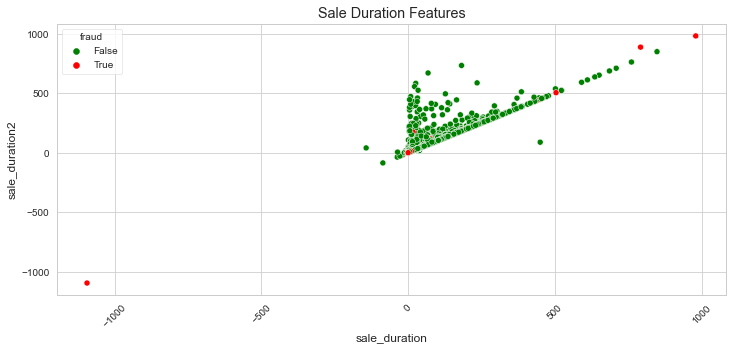

In [39]:
# Two separate sale duration features; not always the same apparently 

fig, ax = plt.subplots(figsize=(12, 5))
sns.scatterplot(x=df.sale_duration, y=df.sale_duration2, hue=df.fraud, palette={True:'r', False:'g'})
ax.tick_params(axis='x', rotation=45)
ax.set_title('Sale Duration Features')

### Don't forget to Establish a baseline

In [40]:
model_df = df.copy()

In [41]:
# Dropping columns with lots of NaNs or text only 

model_df.drop(columns=['acct_type', 'description', 'name', 
                 'org_desc', 'previous_payouts', 
                 'ticket_types', 'venue_country', 
                 'venue_longitude', 'venue_latitude', 
                 'venue_name', 'venue_state', 'venue_address', 'has_header'], inplace=True)


In [42]:
# label encoding first to make it easy... 
le = LabelEncoder()

In [43]:
# Testing out the label encoder on one column 

model_df['country'] = le.fit_transform(model_df['country'])


In [44]:
model_df.country

0        65
1        65
2        65
3        30
4        65
         ..
14332    65
14333    65
14334    67
14335    65
14336    24
Name: country, Length: 14337, dtype: int64

In [45]:
# Label encoding for other categorical columns 
model_df['currency'] = le.fit_transform(model_df['currency'])
model_df['email_domain'] = le.fit_transform(model_df['email_domain'])
model_df['listed'] = le.fit_transform(model_df['listed'])
model_df['payee_name'] = le.fit_transform(model_df['payee_name'])
model_df['payout_type'] = le.fit_transform(model_df['payout_type'])
model_df['org_name'] = le.fit_transform(model_df['org_name'])


In [46]:
model_df.dropna(inplace=True)

In [47]:
model_df.shape

(14132, 32)

In [48]:
df.fraud.value_counts()

False    13044
True      1293
Name: fraud, dtype: int64

In [49]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14132 entries, 0 to 14336
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   approx_payout_date  14132 non-null  int64  
 1   body_length         14132 non-null  int64  
 2   channels            14132 non-null  int64  
 3   country             14132 non-null  int64  
 4   currency            14132 non-null  int64  
 5   delivery_method     14132 non-null  float64
 6   email_domain        14132 non-null  int64  
 7   event_created       14132 non-null  int64  
 8   event_end           14132 non-null  int64  
 9   event_published     14132 non-null  float64
 10  event_start         14132 non-null  int64  
 11  fb_published        14132 non-null  int64  
 12  gts                 14132 non-null  float64
 13  has_analytics       14132 non-null  int64  
 14  has_logo            14132 non-null  int64  
 15  listed              14132 non-null  int64  
 16  name

In [50]:
# Retain new-df as a checkpoint to return to -- new_df is checkpoint, make a copy if messing with ... 

new_df = model_df.copy()

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
y = model_df.pop('fraud')

In [53]:
X = model_df.copy()

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [55]:
X_train.to_csv('/Users/beckyepeters/dsi_galvanize/groupprojects/fraud-detection-case-study/data/X_train.csv', index=False)

In [56]:
X_test.to_csv('/Users/beckyepeters/dsi_galvanize/groupprojects/fraud-detection-case-study/data/X_test.csv', index=False)

In [57]:
y_train.to_csv('/Users/beckyepeters/dsi_galvanize/groupprojects/fraud-detection-case-study/data/y_train.csv', index=False)

In [58]:
y_test.to_csv('/Users/beckyepeters/dsi_galvanize/groupprojects/fraud-detection-case-study/data/y_test.csv', index=False)

In [59]:
y_train.value_counts(normalize=True)

False    0.919898
True     0.080102
Name: fraud, dtype: float64

In [60]:
y_test.value_counts(normalize=True)

False    0.919898
True     0.080102
Name: fraud, dtype: float64

In [61]:
feature_list = list(model_df.columns)


In [62]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (10599, 31)
Training Labels Shape: (10599,)
Testing Features Shape: (3533, 31)
Testing Labels Shape: (3533,)


In [63]:
y_test.sum()


283

In [64]:
len(y_test) - y_test.sum()

3250

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold


In [66]:
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

In [67]:
rf_classifier = rf.fit(X_train, y_train)

In [68]:
preds = rf_classifier.predict(X_test)

In [69]:
from sklearn import metrics

In [70]:
print("Accuracy:",metrics.accuracy_score(y_test, preds))
print("Precision:",metrics.precision_score(y_test, preds))
print("Recall:",metrics.recall_score(y_test, preds))
print("F1:",metrics.f1_score(y_test, preds))


Accuracy: 0.97594112652137
Precision: 0.9267241379310345
Recall: 0.7597173144876325
F1: 0.8349514563106797


Text(0.8, 0.06, 'F1 Score')

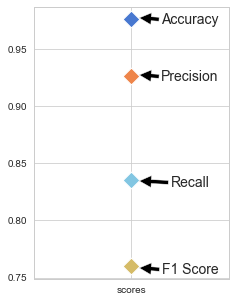

In [71]:
sns.set_style('whitegrid')
scores = ['scores']
fig, ax = plt.subplots(figsize=(3.5, 5))
sns.scatterplot(x=scores, y=metrics.accuracy_score(y_test, preds), marker='D', color='#4878d0', s=140, ax=ax)
sns.scatterplot(x=scores, y=metrics.precision_score(y_test, preds), marker='D', color='#ee854a', s=140, ax=ax)
sns.scatterplot(x=scores, y=metrics.recall_score(y_test, preds), marker='D', color='#d5bb67', s=140, ax=ax)
sns.scatterplot(x=scores, y=metrics.f1_score(y_test, preds), marker='D', color='#82c6e2', s=140, ax=ax)
ax.annotate('Accuracy',
            xy=(.54, 0.96),
            xytext=(0.8, 0.98),
            xycoords=('axes fraction'),
            fontsize=14,
            arrowprops=dict(facecolor='black'), 
           horizontalalignment='center', verticalalignment='top')
ax.annotate('Precision',
            xy=(.54, 0.75),
            xytext=(0.8, 0.77),
            xycoords='axes fraction',
            fontsize=14,
            arrowprops=dict(facecolor='black'), 
           horizontalalignment='center', verticalalignment='top')
ax.annotate('Recall',
            xy=(.54, 0.36),
            xytext=(0.8, 0.38),
            xycoords='axes fraction',
            fontsize=14,
            arrowprops=dict(facecolor='black'), 
           horizontalalignment='center', verticalalignment='top')
ax.annotate('F1 Score',
            xy=(.54, 0.04),
            xytext=(0.8, 0.06),
            xycoords='axes fraction',
            fontsize=14,
            arrowprops=dict(facecolor='black'), 
           horizontalalignment='center', verticalalignment='top')


In [72]:
pred_prob = rf.predict_proba(X_test)

In [73]:
# Just keep probabilities for positive class (fraud)
y_hat_fraud = pred_prob[:, 1]

In [74]:
y_hat_fraud

array([0.01, 0.  , 0.  , ..., 0.93, 0.01, 0.01])

In [75]:
from sklearn.metrics import roc_curve

In [76]:
fpr, tpr, thresh = roc_curve(y_test, y_hat_fraud)

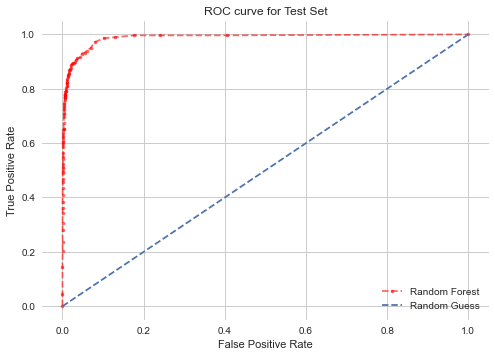

In [77]:
plt.style.use('seaborn')
sns.set_style('whitegrid')

plt.plot(fpr, tpr, linestyle='--',color='red', marker='.', alpha=0.6, label='Random Forest')
plt.plot([0,1], [0,1], linestyle='--', label='Random Guess')

plt.title('ROC curve for Test Set')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.show();

In [78]:
gmeans = np.sqrt(tpr * (1-fpr))

In [79]:
ix = np.argmax(gmeans)

In [80]:
print('Best Threshold = %f, G-mean=%.3f' % (thresh[ix], gmeans[ix]))

Best Threshold = 0.060000, G-mean=0.946


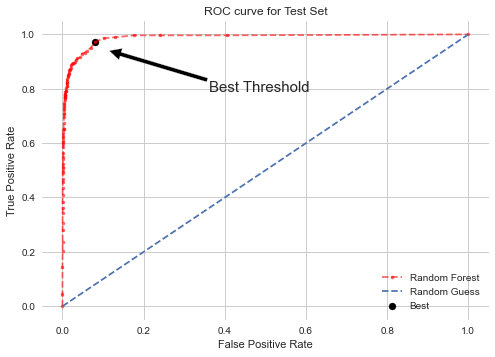

In [81]:
fig, ax = plt.subplots()
plt.style.use('seaborn')
sns.set_style('whitegrid')

plt.plot(fpr, tpr, linestyle='--',color='red', marker='.', alpha=0.6, label='Random Forest')
plt.plot([0,1], [0,1], linestyle='--', label='Random Guess')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')

ax.annotate('Best Threshold',
            xy=(0.15, 0.9),
            xytext=(.6, 0.8),
            xycoords='axes fraction',
            fontsize=15,
            arrowprops=dict(facecolor='black'), 
           horizontalalignment='right', verticalalignment='top')
plt.title('ROC curve for Test Set')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.show();

In [82]:
J = tpr-fpr
ix = np.argmax(J)
best_thresh = thresh[ix]
best_thresh

0.06

In [83]:
from sklearn.metrics import precision_recall_curve

In [84]:
precision, recall, thresholds = precision_recall_curve(y_test, preds)

In [85]:
no_skill = len(y_test[y_test=='True']) / len(y_test)

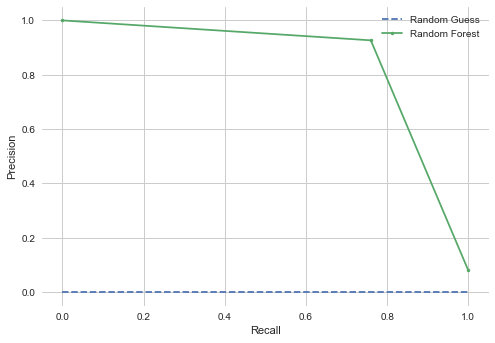

In [86]:
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Random Guess')
plt.plot(recall, precision, marker = '.', label = 'Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show();

In [87]:
#Use F score to determine a good balance between precision and recall; see how low that makes precision and if we want to bump it for recall 
fscore = (2 * precision * recall) / (precision + recall)
ix = np.argmax(fscore)
print('Best Threshold to balance Precision, Recall = %f, F-Score=%.3f' % (thresh[ix], fscore[ix]))

Best Threshold to balance Precision, Recall = 1.000000, F-Score=0.835


In [88]:
threshold = 0.06

pred_prob = rf.predict_proba(X_test)
predicted = (pred_prob [:, 1] >= threshold).astype('int')
accuracy = metrics.accuracy_score(y_test, predicted)
recall = metrics.recall_score(y_test, predicted)
precision = metrics.precision_score(y_test, predicted)
f1 = metrics.f1_score(y_test, predicted)

In [89]:
accuracy, recall, precision, f1

(0.9241437871497311, 0.9717314487632509, 0.514018691588785, 0.6723716381418092)

In [99]:
from sklearn.metrics import confusion_matrix
cf_thresh = confusion_matrix(y_test, predicted)
cf_thresh

array([[2990,  260],
       [   8,  275]])

In [100]:
thresholds = np.linspace(0, 1, 100)
thresholds = thresholds.round(2)
accuracy = []
recall = []
precision = []
f1 = []
df = pd.DataFrame(index=thresholds)
for thresh in thresholds: 
    pred_prob = rf.predict_proba(X_test)
    predicted = (pred_prob[:, 1] >= thresh).astype('int')
    acc = metrics.accuracy_score(y_test, predicted)
    rec = metrics.recall_score(y_test, predicted)
    prec = metrics.precision_score(y_test, predicted)
    f1sc = metrics.f1_score(y_test, predicted)
    accuracy.append(acc)
    recall.append(rec)
    precision.append(prec)
    f1.append(f1sc)

df['accuracy'] = accuracy
df['recall'] = recall
df['precision'] = precision
df['f1'] = f1



In [101]:
df

,accuracy,recall,precision,f1
0.00,0.080102,1.000000,0.080102,0.148323
0.01,0.627512,0.996466,0.176581,0.300000
0.02,0.779224,0.996466,0.265787,0.419643
0.03,0.838381,0.996466,0.330986,0.496916
0.04,0.880838,0.989399,0.401146,0.570846
...,...,...,...,...
0.96,0.938579,0.236749,0.985294,0.381766
0.97,0.935749,0.201413,0.982759,0.334311
0.98,0.931503,0.144876,1.000000,0.253086
0.99,0.927540,0.095406,1.000000,0.174194


In [102]:
thresholds_df = df.copy

In [103]:
pal = sns.color_palette('muted')
hexes = pal.as_hex()
print(hexes)
hexes

['#4878d0', '#ee854a', '#6acc64', '#d65f5f', '#956cb4', '#8c613c', '#dc7ec0', '#797979', '#d5bb67', '#82c6e2']


['#4878d0',
 '#ee854a',
 '#6acc64',
 '#d65f5f',
 '#956cb4',
 '#8c613c',
 '#dc7ec0',
 '#797979',
 '#d5bb67',
 '#82c6e2']

Text(0.5, 0, 'Classification Thresholds')

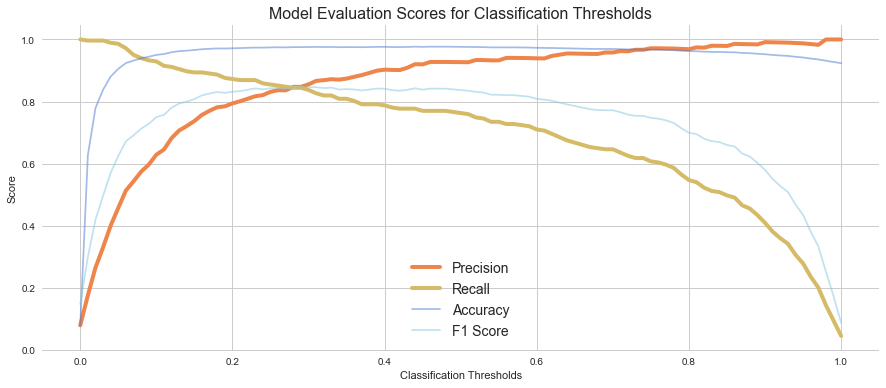

In [104]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.set_style('whitegrid')

sns.lineplot(x=thresholds, y=precision, ax=ax, color='#ee854a', label='Precision', linewidth=4)
sns.lineplot(x=thresholds, y=recall, ax=ax, color='#d5bb67', label='Recall', linewidth=4)
sns.lineplot(x=thresholds, y=accuracy, ax=ax, color='#4878d0', label='Accuracy', alpha=0.5)
sns.lineplot(x=thresholds, y=f1, ax=ax, color='#82c6e2', label='F1 Score', alpha=0.5)
ax.set_title('Model Evaluation Scores for Classification Thresholds', fontsize=16)
ax.legend(fontsize=14)
ax.set_ylabel('Score')
ax.set_xlabel('Classification Thresholds')

In [105]:
intersection_set = set.intersection(set(precision), set(recall))
print(intersection_set)
df.index[df['precision'] == 0.8409893992932862]


{1.0}


Float64Index([], dtype='float64')

In [106]:
fraud_count = np.sum(y_test)
fraud_count

283

In [107]:
df.loc[0.28]

accuracy     0.975375
recall       0.844523
precision    0.847518
f1           0.846018
Name: 0.28, dtype: float64

In [108]:
# thresh of 0.28 where P / R are 'balanced'


In [109]:
threshold = 0.28

pred_prob = rf.predict_proba(X_test)
predicted = (pred_prob [:, 1] >= threshold).astype('int')
accuracy = metrics.accuracy_score(y_test, predicted)
recall = metrics.recall_score(y_test, predicted)
precision = metrics.precision_score(y_test, predicted)
f1 = metrics.f1_score(y_test, predicted)

In [110]:
accuracy, precision, recall, f1

(0.9753750353806963,
 0.8475177304964538,
 0.8445229681978799,
 0.8460176991150442)

In [111]:
confusion = confusion_matrix(y_test, predicted)
confusion

array([[3207,   43],
       [  44,  239]])

(0.75, 1.0)

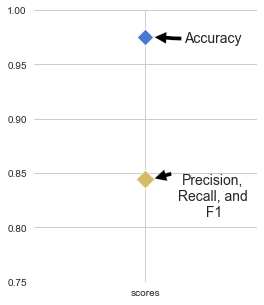

In [112]:
sns.set_style('whitegrid')
scores = ['scores']
fig, ax = plt.subplots(figsize=(4, 5))
sns.scatterplot(x=scores, y=metrics.accuracy_score(y_test, predicted), marker='D', color='#4878d0', s=140, ax=ax)
# sns.scatterplot(x=scores, y=metrics.precision_score(y_test, predicted), marker='D', color='#ee854a', s=210, ax=ax)
sns.scatterplot(x=scores, y=metrics.recall_score(y_test, predicted), marker='D', color='#d5bb67', s=180, ax=ax)
# sns.scatterplot(x=scores, y=metrics.f1_score(y_test, predicted), marker='D', color='#82c6e2', s=140, ax=ax)
ax.annotate('Accuracy',
            xy=(.54, 0.90),
            xytext=(0.8, 0.92),
            xycoords=('axes fraction'),
            fontsize=14,
            arrowprops=dict(facecolor='black'), 
           horizontalalignment='center', verticalalignment='top')
ax.annotate('Precision,\n Recall, and \n F1',
            xy=(.54, 0.38),
            xytext=(0.8, 0.40),
            xycoords='axes fraction',
            fontsize=14,
            arrowprops=dict(facecolor='black'), 
           horizontalalignment='center', verticalalignment='top')
ax.set_ylim(0.75,1)

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
lr = LogisticRegression(class_weight='balanced', random_state=42)

In [69]:
lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [70]:
pred_lr = lr.predict(X_test)

In [71]:
print("Accuracy:",metrics.accuracy_score(y_test, pred_lr))
print("Precision:",metrics.precision_score(y_test, pred_lr))
print("Recall:",metrics.recall_score(y_test, pred_lr))
print("F1:",metrics.f1_score(y_test, pred_lr))


Accuracy: 0.7449759411265213
Precision: 0.22162162162162163
Recall: 0.8692579505300353
F1: 0.353194544149318


In [72]:
from sklearn.metrics import confusion_matrix

In [73]:
conf_mat = confusion_matrix(y_test, preds)
conf_mat_lr = confusion_matrix(y_test, pred_lr)

In [74]:
# tn, fp, fn, tp
conf_mat, conf_mat_lr

(array([[3234,   16],
        [  67,  216]]),
 array([[2386,  864],
        [  37,  246]]))

In [113]:
feature_imp = pd.Series(rf.feature_importances_,index=feature_list).sort_values(ascending=False)
feature_imp

sale_duration2        0.163538
sale_duration         0.142902
num_payouts           0.080024
user_age              0.078747
user_type             0.051374
payout_type           0.049480
num_order             0.042945
org_twitter           0.040303
body_length           0.037765
gts                   0.034375
user_created          0.033973
org_facebook          0.031938
email_domain          0.024920
name_length           0.017897
event_published       0.017178
approx_payout_date    0.016276
org_name              0.016208
event_end             0.015849
delivery_method       0.015753
event_start           0.014811
event_created         0.014544
object_id             0.014372
payee_name            0.011791
channels              0.009397
country               0.006173
currency              0.005848
has_logo              0.003547
fb_published          0.003171
show_map              0.002604
listed                0.001860
has_analytics         0.000437
dtype: float64

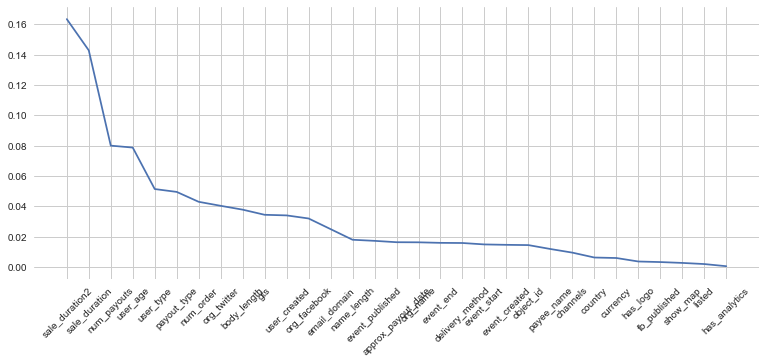

In [114]:
fig, ax = plt.subplots(figsize=(13, 5))
sns.lineplot(data=feature_imp, ax=ax)
ax.tick_params(axis='x', rotation=45)

In [115]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [116]:
np.unique( preds )

array([False,  True])

In [117]:
param_grid = {'n_estimators': [140, 150, 175], 'criterion': ['gini', 'entropy'], 
             'max_depth': [10, 20, 40], 'max_features': [5, 10, 20]}

In [118]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [119]:
skf = StratifiedKFold()

In [120]:
grid_rf = GridSearchCV(rf, param_grid, cv=skf)
grid_rf.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
grid_rf.best_estimator_

In [ ]:
grid_rf.best_params_

In [ ]:
y_test.shape

In [121]:
rf_hyp = RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=20, max_features=10, n_estimators=175,
                       random_state=42)

In [122]:
rf_hyp_clf = rf_hyp.fit(X_train, y_train)

In [123]:
preds_rf_hyp = rf_hyp_clf.predict(X_test)

In [124]:
print("Accuracy:",metrics.accuracy_score(y_test, preds_rf_hyp))
print("Precision:",metrics.precision_score(y_test, preds_rf_hyp))
print("Recall:",metrics.recall_score(y_test, preds_rf_hyp))
print("F1:",metrics.f1_score(y_test, preds_rf_hyp))


Accuracy: 0.9765072176620436
Precision: 0.9273504273504274
Recall: 0.7667844522968198
F1: 0.8394584139264991


In [125]:
cf_hyp = confusion_matrix(y_test, preds_rf_hyp)
cf_hyp

array([[3233,   17],
       [  66,  217]])

In [525]:
from sklearn.ensemble import GradientBoostingClassifier


In [526]:
gbc = GradientBoostingClassifier(random_state=42)

In [527]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [528]:
preds_gbc = gbc.predict(X_test)

In [529]:
print("Accuracy:",metrics.accuracy_score(y_test, preds_gbc))
print("Precision:",metrics.precision_score(y_test, preds_gbc))
print("Recall:",metrics.recall_score(y_test, preds_gbc))
print("F1:",metrics.f1_score(y_test, preds_gbc))


Accuracy: 0.9767902632323804
Precision: 0.9102040816326531
Recall: 0.7879858657243817
F1: 0.8446969696969697


Try without Sale Duration 2 and see if better results: Nope, same results

In [246]:
sd_df = new_df.copy()

In [247]:
sd_df.drop(columns='sale_duration2', inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split()

In [248]:
sd_rf = RandomForestClassifier(class_weight='balanced', random_state=42)

In [249]:
sd_rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [250]:
sd_preds = sd_rf.predict(X_test)

In [251]:
print("Accuracy:",metrics.accuracy_score(y_test, sd_preds))
print("Precision:",metrics.precision_score(y_test, sd_preds))
print("Recall:",metrics.recall_score(y_test, sd_preds))
print("F1:",metrics.f1_score(y_test, sd_preds))

Accuracy: 0.9750919898103595
Precision: 0.892
Recall: 0.7852112676056338
F1: 0.8352059925093632


In [253]:
sd_cm = confusion_matrix(y_test, sd_preds)
sd_cm

array([[3222,   27],
       [  61,  223]])

#### Trying a Min Max Scaler to see if we get better results; Nope, same. 

In [265]:
mm_df = new_df.copy()

In [259]:
from sklearn.preprocessing import MinMaxScaler

In [266]:
y = mm_df.pop('fraud')
X = mm_df.copy()

In [267]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [260]:
scaler = MinMaxScaler()

In [268]:
X_train_scaled = scaler.fit_transform(X_train)

In [269]:
mm_model = RandomForestClassifier(class_weight='balanced', random_state = 42)

In [270]:
mm_model.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [271]:
X_test_scaled = scaler.transform(X_test)
mm_pred = mm_model.predict(X_test_scaled)

In [272]:
print("Accuracy:",metrics.accuracy_score(y_test, mm_pred))
print("Precision:",metrics.precision_score(y_test, mm_pred))
print("Recall:",metrics.recall_score(y_test, mm_pred))
print("F1:",metrics.f1_score(y_test, mm_pred))

Accuracy: 0.9748089442400226
Precision: 0.891566265060241
Recall: 0.7816901408450704
F1: 0.8330206378986865


In [126]:
import joblib

In [127]:
filename = 'tuned_balanced_rf.sav'
joblib.dump(rf_hyp, filename)

['tuned_balanced_rf.sav']

In [143]:
len(X_train.columns)

31

In [133]:
type(X_train)

pandas.core.frame.DataFrame

In [145]:
X_train

,approx_payout_date,body_length,channels,country,currency,delivery_method,email_domain,event_created,event_end,event_published,...,org_name,org_twitter,payee_name,payout_type,sale_duration,sale_duration2,show_map,user_age,user_created,user_type
4366,1369980000,568,11,9,1,0.0,2716,1365791994,1369548000,1.365800e+09,...,6,14.0,0,1,43.0,43,1,2,1365624871,3
2205,1350851400,735,8,24,3,0.0,5582,1345553145,1350419400,1.345553e+09,...,4291,0.0,0,1,56.0,56,1,1155,1245757610,4
12787,1362528000,100,0,65,6,0.0,173,1356024888,1362096000,1.356025e+09,...,7786,12.0,0,1,70.0,70,1,1222,1250441017,4
10622,1329670800,10416,8,9,1,0.0,3691,1327071641,1329238800,1.327868e+09,...,5348,0.0,0,1,16.0,25,1,51,1322687314,3
1912,1374624000,2326,5,24,3,0.0,1786,1368709337,1374192000,1.368725e+09,...,6028,18.0,0,1,63.0,63,1,338,1339499843,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12924,1375588800,9838,8,4,0,0.0,4105,1370768089,1375156800,1.370871e+09,...,6503,0.0,0,1,49.0,50,1,138,1358855720,4
5647,1343413800,1091,8,24,3,0.0,3335,1332499333,1342981800,1.332500e+09,...,5333,11.0,0,1,121.0,121,1,653,1276126545,4
5881,1371009600,1767,8,9,1,0.0,5183,1369321904,1370577600,1.369322e+09,...,0,0.0,0,1,14.0,14,1,1129,1271776754,4
10306,1366956000,273,8,65,6,0.0,2084,1358508254,1366524000,1.358509e+09,...,6817,0.0,0,1,92.0,92,1,0,1358508252,1


In [146]:
sample = X_train.loc[2205].tolist()

In [147]:
len(sample)

31

In [148]:
sample

[1350851400.0,
 735.0,
 8.0,
 24.0,
 3.0,
 0.0,
 5582.0,
 1345553145.0,
 1350419400.0,
 1345553417.0,
 1350405000.0,
 0.0,
 411.07,
 0.0,
 1.0,
 1.0,
 23.0,
 4.0,
 1.0,
 4165664.0,
 50.0,
 4291.0,
 0.0,
 0.0,
 1.0,
 56.0,
 56.0,
 1.0,
 1155.0,
 1245757610.0,
 4.0]